# Initial EDA on "All the News" dataset
The news article dataset is downloaded from [this link](https://components.one/datasets/all-the-news-articles-dataset/).

In [1]:
import os
import pandas as pd

# Import Matplotlib and specify custom settings
import matplotlib.pyplot as plt
%matplotlib inline

#### Set ```rcParams``` for global plot settings

In [2]:
rc_fonts = {'figure.figsize': (15, 8),
            'axes.titlesize': 20,
            'xtick.labelsize': 16,
            'ytick.labelsize': 16,
            'legend.fontsize': 20,
           }
plt.rcParams.update(rc_fonts)
plt.style.use('ggplot')

### Read in data into Pandas DataFrame

In [3]:
datapath = '../data/all_the_news_v2.csv'
colnames = ['title', 'author', 'date', 'content', 'year', 'month', 'publication', 'length']

news = pd.read_csv(datapath, usecols=colnames, parse_dates=['date'])

#### Size of dataset

In [4]:
news.shape

(146150, 8)

There are $146,150$ news articles in total.

In [5]:
news.head()

,title,author,date,content,year,month,publication,length
0,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,2376
1,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,2125
2,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,3310
3,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,3632
4,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,262


#### Which publications are present?

In [6]:
pubs = news.groupby('publication').agg('count')['title']
pubs.columns = ['count']
pubs = pubs.sort_values(ascending=False)
pubs

publication
Breitbart              23788
New York Post          17729
NPR                    12022
CNN                    11773
Reuters                11157
Buzzfeed News          10694
Los Angeles Times       9011
Guardian                8687
Business Insider        8090
New York Times          7813
Atlantic                7715
National Review         6233
Talking Points Memo     5591
Fox News                4434
Verge                   1255
Vox                      156
Name: title, dtype: int64

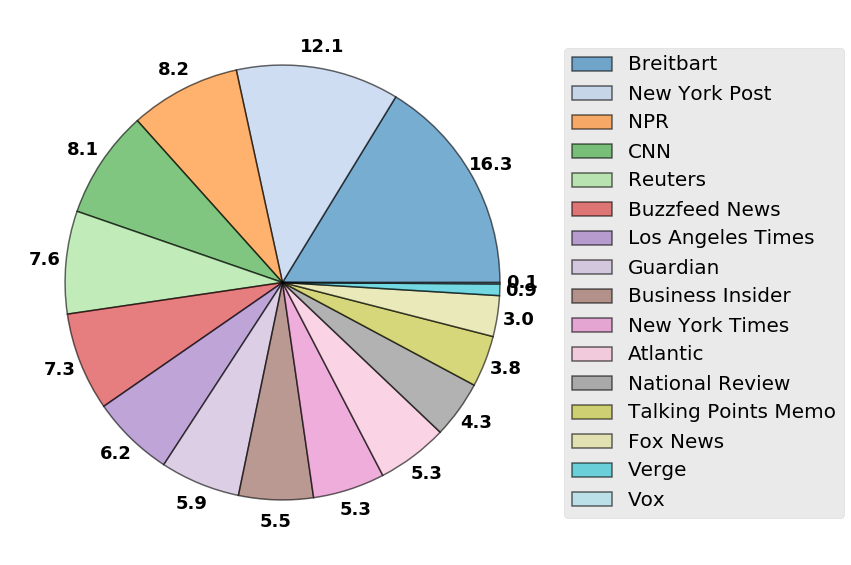

In [7]:
labels = 100*pubs.values/(sum(pubs.values))
pubs.plot(kind='pie', figsize=(14, 10), 
          colormap='tab20',
          labels=None,
          autopct='%.1f',
          pctdistance=1.1,
          textprops={'fontsize': 18, 'fontweight': 'bold'},
          wedgeprops={'linewidth': 1.5, 'edgecolor': 'k', 'antialiased': True, 'alpha': 0.6},
         );
plt.ylabel('');
plt.legend(pubs.index, loc='center left', bbox_to_anchor=(1, 0.5));

### Summary of date stamps for all articles in dataset

In [8]:
news['date'].describe()

count                  143158
unique                   1480
top       2017-01-13 00:00:00
freq                      415
first     2000-05-15 00:00:00
last      2017-07-05 00:00:00
Name: date, dtype: object

In [9]:
# Earliest news article
news['date'].min()

Timestamp('2000-05-15 00:00:00')

In [10]:
# Most recent news article
news['date'].max()

Timestamp('2017-07-05 00:00:00')

### Total number of articles per year in dataset

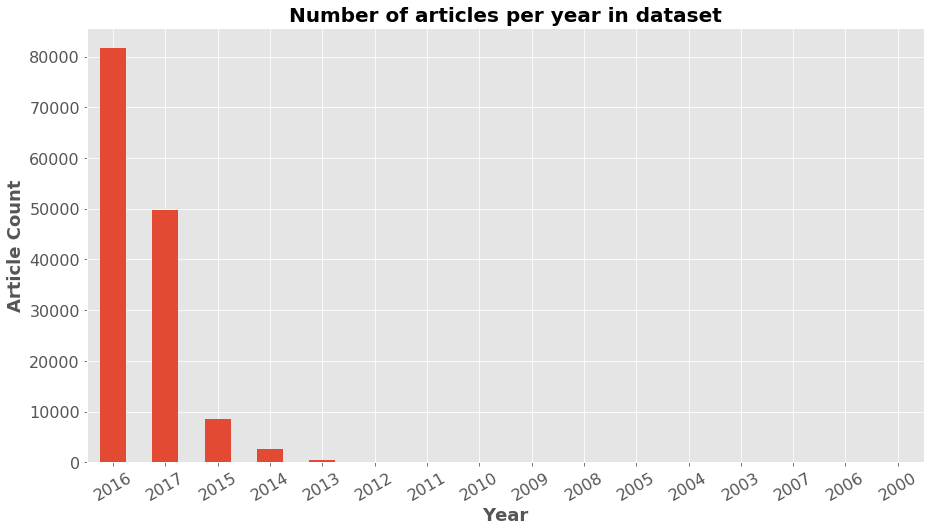

In [11]:
year_counts = news['year'].value_counts().to_frame()
ax = year_counts.plot(kind='bar', rot=30, legend=False)
ax.set_xticklabels([str(int(year)) for year in year_counts.index])
plt.xlabel('year');
plt.title('Number of articles per year in dataset', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Article Count', fontdict={'fontsize': 18, 'fontweight': 'bold'});
plt.xlabel('Year', fontdict={'fontsize': 18, 'fontweight': 'bold'});

### Order by number of articles per news publication (in this dataset)

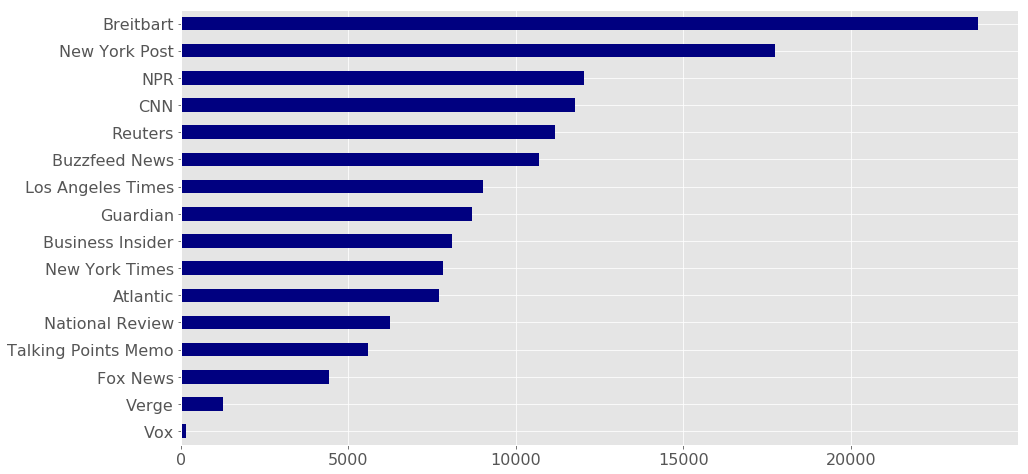

In [12]:
per_pub = news['publication'].value_counts().to_frame()
per_pub.sort_values(by='publication', ascending=True).plot(kind='barh', \
                                                        colormap='jet', \
                                                        legend=False);

### Example headline and news content

In [13]:
idx = 4
print(news['title'][idx])
test = news['content'][idx]
test

Tour Black Panther’s reimagined homeland with Ta-Nehisi Coates


'      Ahead of Black Panther’s 2018 theatrical release, Marvel turned to Ta-Nehisi Coates to breathe new life into the nation of Wakanda. “I made most of my career analyzing the forces of racism and white supremacy as an idea in America. But what you begin to realize after you do that long enough — you aren’t talking about anything specific. In other words, you aren’t really talking about whether some people have lighter skin or some people have blonde hair or some people have blue eyes or some people have kinky hair. You’re talking about power.” This is the voice of journalist, cultural critic, and best-selling author Ta-Nehisi Coates. Coates is the writer of Marvel’s latest entry in the Black Panther canon, Black Panther: A Nation Under Our Feet. With the book, he’s been charged with turning one of Marvel’s least understood and appreciated black characters into a marquee superhero.Even if you don’t read comics, you likely know about the character Black Panther, thanks to his on-scre

### Group by median article length (in words) per publication

In [14]:
len_groups = news.groupby('publication')['length'].median()
len_groups

publication
Atlantic               1136.0
Breitbart               410.0
Business Insider        346.5
Buzzfeed News           836.0
CNN                     697.0
Fox News                589.5
Guardian                872.0
Los Angeles Times       792.0
NPR                     779.0
National Review         897.0
New York Post           408.0
New York Times         1211.0
Reuters                 787.0
Talking Points Memo     300.0
Verge                   961.0
Vox                    1528.5
Name: length, dtype: float64

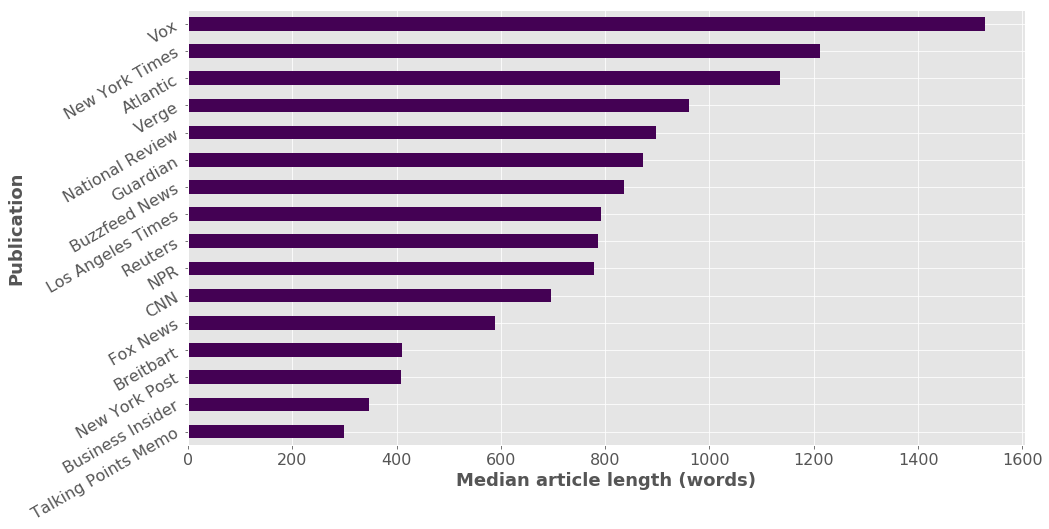

In [15]:
len_groups.sort_values(ascending=True).plot(kind='barh',
                                            colormap='viridis',
                                            legend=False,
                                            rot=30,
                                           );
plt.xlabel('Median article length (words)', fontdict={'fontsize': 18, 'fontweight': 'bold'});
plt.ylabel('Publication', fontdict={'fontsize': 18, 'fontweight': 'bold'});